<a href="https://colab.research.google.com/github/danielmlow/tutorials/blob/main/speech_shaped_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech-shaped noise

Noise shaped with speech's amplitude. Impose intensity contour (syllable rate, phonetic structure). 

Not recommended to do with single word, because the strongest segment might be the vowel. So the noise will sound like the vowel and its spectrum will look like the vowel's spectrum.

Steps:
1. Load signal
1b. ToDo: Average speech utterances from the recording (using voice activity detection to find the speech utterances and remove silences)
2. Apply Hilbert transform to extract envelope.
3. Multiply envelope x noise to obtain 

In [138]:
import os 
import pandas as pd
import numpy as np
import random
import datetime
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Audio
import matplotlib.pyplot as plt
from scipy.signal import hilbert


In [139]:
from google.colab import drive
# On google colab
# Mount GDrive and attach it to the colab for data I/O
drive.mount('/content/drive')
# Browse to find the right path
os.listdir('/content/drive/My Drive/datum/umass/audio_samples/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['f2bjrop1.0.wav',
 'f2bjrop1.1.wav',
 'f2btrop6.0.wav',
 'TR_04_OwlBabies Clip.wav',
 'speech_shaped_noise_example.wav']

In [140]:
# figure config
plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams['figure.dpi'] = 120

In [141]:

def speech_shaped_noise(path_to_wav, noise_mean=0, noise_std = 1, gen_figures=True, play_audio=True):
  # wav_file = 'TR_04_OwlBabies Clip.wav'
  print('\n\n====='+path_to_wav)
  sr, data = wavfile.read(path_to_wav)
  data = data [:,0] #extract single channel
  
  # View waveform 
  duration = len(data)/sr
  time = np.arange(0,duration,1/sr) #time vector
  if gen_figures:
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(path_to_wav)
    plt.show()
  if play_audio:
    display(Audio(data=data.T, rate=sr, autoplay=False))
  
  # hilbert transform https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html
  analytic_signal = hilbert(data)
  amplitude_envelope = np.abs(analytic_signal)

  if gen_figures:
    t = np.arange(len(data)) / sr
    signal = plt.plot(t, data, label='signal')
    envelope = plt.plot(t, amplitude_envelope, label='envelope', c='orange',linestyle='dashed', alpha=0.5)
    plt.xlabel("time in seconds")
    plt.xlim((0.3,0.35))
    plt.title('Zoomed in with amplitude envelope displayed')
    plt.show()
  
  # noise
  mean = noise_mean
  std = noise_std
  num_samples = len(data)
  noise = np.random.normal(mean, std, size=num_samples)
  if gen_figures:
    plt.plot(noise)
    plt.title('Noise')
    
    plt.show()
  
  # Speech shaped noise
  speech_shaped_noise = amplitude_envelope*noise
  if gen_figures:
    plt.plot(speech_shaped_noise)
    plt.title('Speech-shaped noise')
    plt.show()
  display(Audio(data=speech_shaped_noise.T, rate=sr, autoplay=False))

  # # plot spectrum
  # fig, axes = plt.subplots(nrows=2, ncols=1)

  # plot time signal:
  
  plt.magnitude_spectrum(data, Fs=sr, scale='dB', color='C1')
  plt.title("Log. Magnitude Spectrum - Speech")
  plt.xlim(0,8000)
  plt.show()

  
  plt.magnitude_spectrum(speech_shaped_noise, Fs=sr, scale='dB', color='C1')
  plt.title("Log. Magnitude Spectrum - Speech-shaped noise")
  plt.xlim(0,8000)
  plt.show()
  





=====/content/drive/My Drive/datum/umass/audio_samples/TR_04_OwlBabies Clip.wav


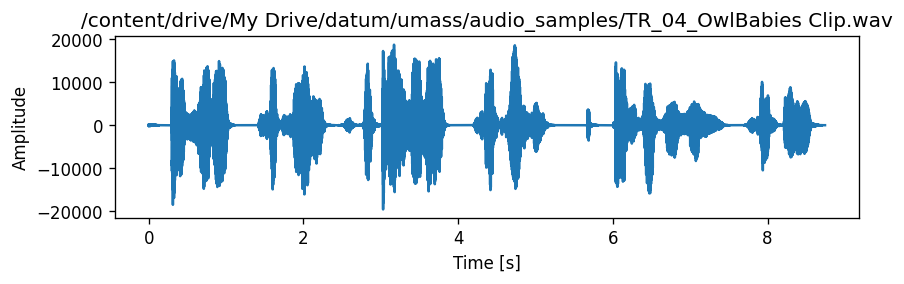

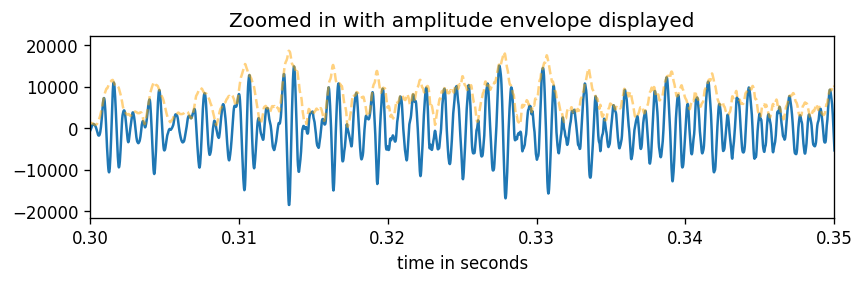

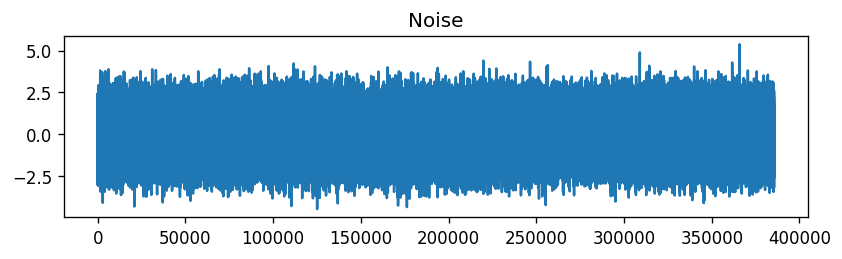

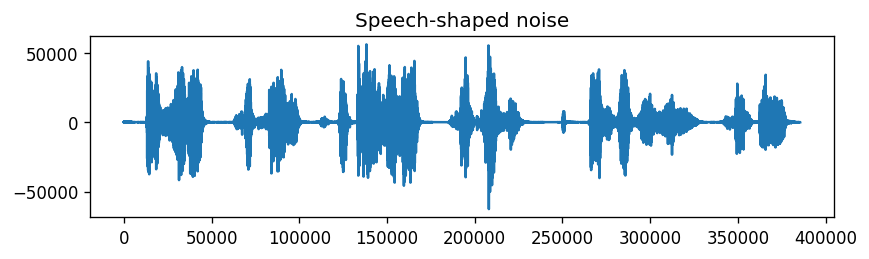

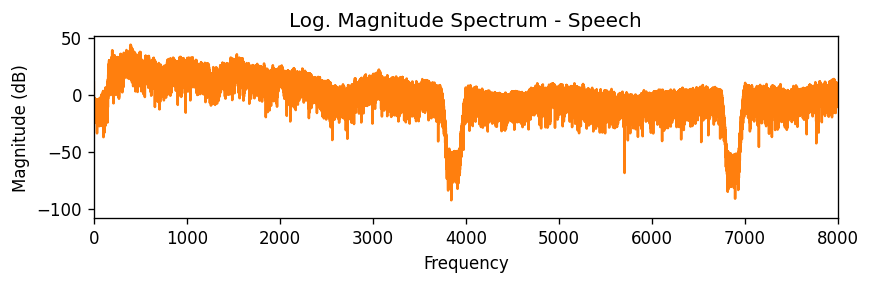

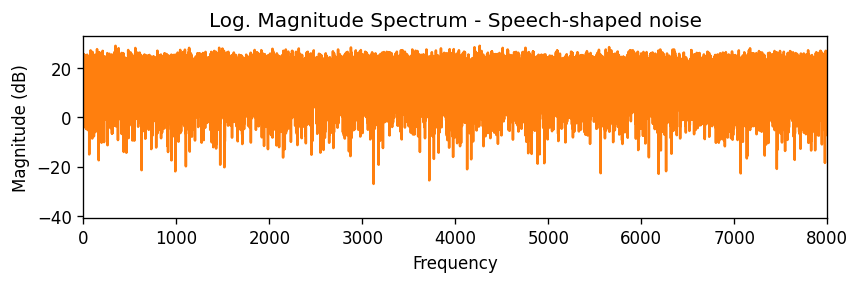

In [142]:
input_dir='/content/drive/My Drive/datum/umass/audio_samples/'

path_to_wav_all = ['TR_04_OwlBabies Clip.wav']
for path_to_wav in path_to_wav_all:
  speech_shaped_noise(input_dir+path_to_wav, noise_mean=0, noise_std = 1, gen_figures=True, play_audio=True)